In [0]:
import gym
from matplotlib import pyplot 
import numpy
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
import random

In [23]:
env = gym.make('Blackjack-v0')
print(env.observation_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))


In [0]:
def sample_policy(observation):
  score, dealer_score, usable_ace = observation
  return 0 if score >=20 else 1

In [0]:
def generate_episode(policy, env):
  states, actions, rewards = [], [], []
  observation = env.reset()
  while True:
    states.append(observation)
    action = policy(observation)
    actions.append(action)
    observation, reward, done, info = env.step(action)
    rewards.append(reward)
    if done:
      break
  return states, actions, rewards

In [0]:
def first_visit_mc_prediction(policy, env, nb_episode):
  value_table = defaultdict(float)
  N = defaultdict(int)
  for k in range(nb_episode):
    if (nb_episode + 1)%50000 == 0:
      print('In episode: ', k + 1)
    states, actions, rewards = generate_episode(policy, env)
    returns = 0
    for t in range(len(states)):
      returns = returns + rewards[t]
      S = states[t]
      if S not in states[:t]:
        N[S] += 1
        value_table[S] = value_table[S] + (returns - value_table[S])/N[S]
  return value_table

In [0]:
def plot_blackjack(V, ax1, ax2):
  player_sum = numpy.arange(12, 21 + 1)
  dealer_show = numpy.arange(1, 10 +1)
  usable_ace = numpy.array([False, True])
  state_values = numpy.zeros((len(player_sum), len(dealer_show), len(usable_ace)))
  for i, player in enumerate(player_sum):
    for j, dealer in enumerate(dealer_show):
      for k, ace in enumerate(usable_ace):
        state_values[i, j, k] = V[player, dealer, ace]
  X, Y = numpy.meshgrid(player_sum, dealer_show)
  ax1.plot_wireframe(X, Y, state_values[:, :, 0])
  ax2.plot_wireframe(X, Y, state_values[:, :, 1])
  for ax in ax1, ax2:
    ax.set_zlim(-1, 1)
    ax.set_ylabel('player sum')
    ax.set_xlabel('dealer showing')
    ax.set_zlabel('state-value')
  

In [0]:
value = first_visit_mc_prediction(sample_policy, env, 500000)

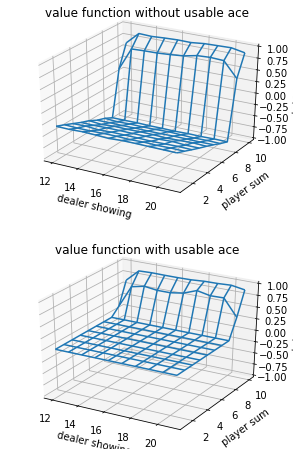

In [0]:
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])

In [0]:
def generate_episode_for_ES(pi, env):
  states, rewards, actions = [], [], []
  init_observation = env.reset()
  init_action = random.randint(0, 1)
  actions.append(action)
  observation, reward, done, info = env.step(action)
  rewards.append(reward)
  if done:
    states.append(observation)
    return states, actions, rewards
  else:
    while True:
      states.append(observation)
      action = pi[state]
      actions.append(action)
      observation, reward, done, info = env.step(action)
      rewards.append(reward)
      if done:
        break
    return states, actions, rewards

In [0]:
def monte_carle_ES(env, nb_episode):
  print('Number of state: ', env.observation_space.n)
  print('Number of action: ', anv.action_space.n)
  #Initialisation 
  pi = defaultdict(int)
  q = {}
  returns = {}
  for state in env.observation_space:
    pi[state] = random.randint(1, env.action_space.n + 1) #Creating pi(s) for all state
    for action in env.action_space:
      q[(state, action)] = 0                              #Initializing all action-values
      returns[(state, action)] = 0                        #Initializing returns 
  
  #Estimation of optimal policies
  for episode in nb_episode:
    ###Generating episode
    returns = 0

